# EDA

## IMPORTAR PAQUETES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

In [7]:
ruta_proyecto = 'C:/Users/Google Drive/DS4B/CursoMachineLearningPython/03_MACHINE_LEARNING/08_CASOS/03_RIESGOS'

Nombres de los ficheros de datos.

In [8]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [9]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [10]:
variables = ['antigüedad_empleo', 'ingresos_verificados', 'rating', 'vivienda',
       'finalidad', 'num_cuotas', 'estado']

In [11]:
def frecuencias_cat(df_cat):
    resultado = df_cat[variables].apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [12]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
9,antigüedad_empleo,9 years,0.035275
8,antigüedad_empleo,8 years,0.040920
7,antigüedad_empleo,7 years,0.041021
6,antigüedad_empleo,6 years,0.044638
4,antigüedad_empleo,4 years,0.061172
5,antigüedad_empleo,5 years,0.063070
11,antigüedad_empleo,desconocido,0.064890
0,antigüedad_empleo,1 year,0.065372
3,antigüedad_empleo,3 years,0.080035
10,antigüedad_empleo,< 1 year,0.085026


### Análisis gráfico

In [13]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

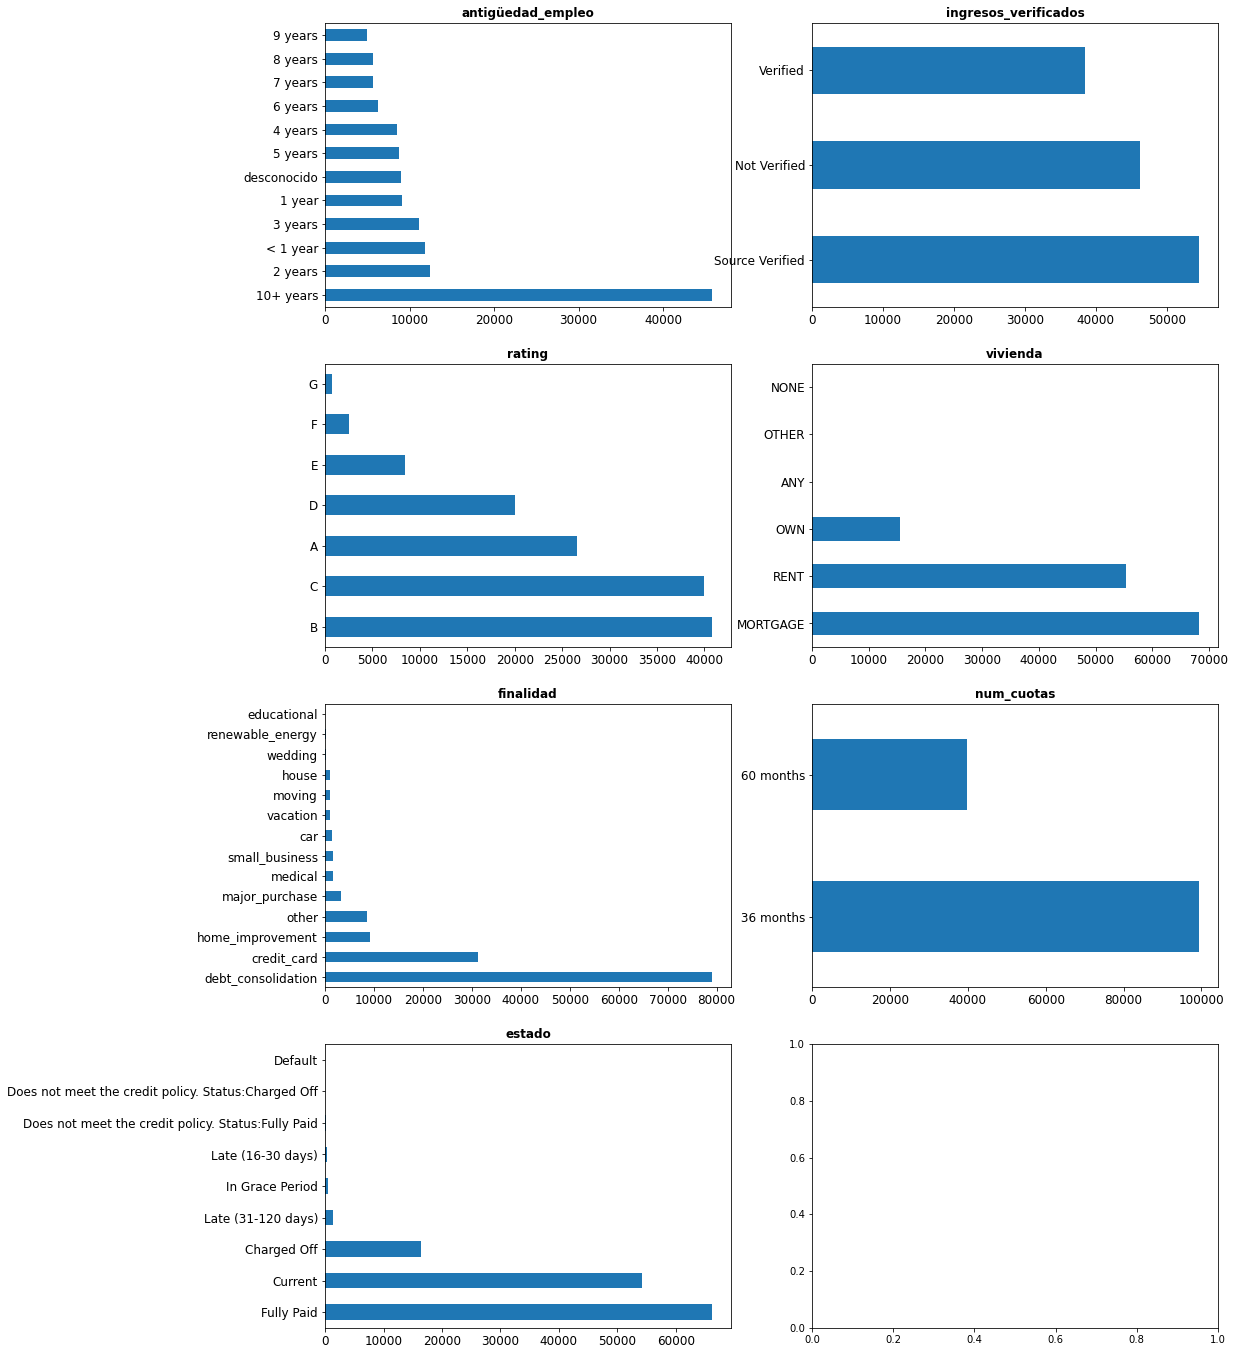

In [14]:
graficos_eda_categoricos(cat[variables])

Conclusiones:

En transformación:

* En vivienda juntar ANY, NONE y OTHER a la categoria mayoritaria
* En finalidad juntar renewable_energy, educational y wedding en 'otros'
* Crear la target a partir de estado

## EDA NUMÉRICAS

### Análisis estadístico

In [15]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [16]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
ingresos,139051.0,74987.865204,65000.00,42132.787020,0.00,46000.00,65000.00,92000.000,300000.00
dti,139051.0,18.856022,17.84,14.195857,-1.00,11.99,17.84,24.480,999.00
num_hipotecas,139051.0,1.506879,1.00,1.877703,0.00,0.00,1.00,2.000,25.00
num_lineas_credito,139051.0,11.603987,11.00,5.642513,0.00,8.00,11.00,14.000,84.00
porc_tarjetas_75p,139051.0,41.076459,33.30,36.439387,0.00,0.00,33.30,66.700,100.00
porc_uso_revolving,139051.0,50.266874,50.20,24.700416,0.00,31.50,50.20,69.200,366.60
num_cancelaciones_12meses,139051.0,0.008702,0.00,0.105425,0.00,0.00,0.00,0.000,7.00
num_derogatorios,139051.0,0.197697,0.00,0.572103,0.00,0.00,0.00,0.000,46.00
num_meses_desde_ult_retraso,139051.0,16.831515,0.00,23.041422,0.00,0.00,0.00,31.000,180.00
principal,139051.0,14971.091722,12800.00,9129.583432,500.00,8000.00,12800.00,20000.000,40000.00


### Análisis gráfico

In [17]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

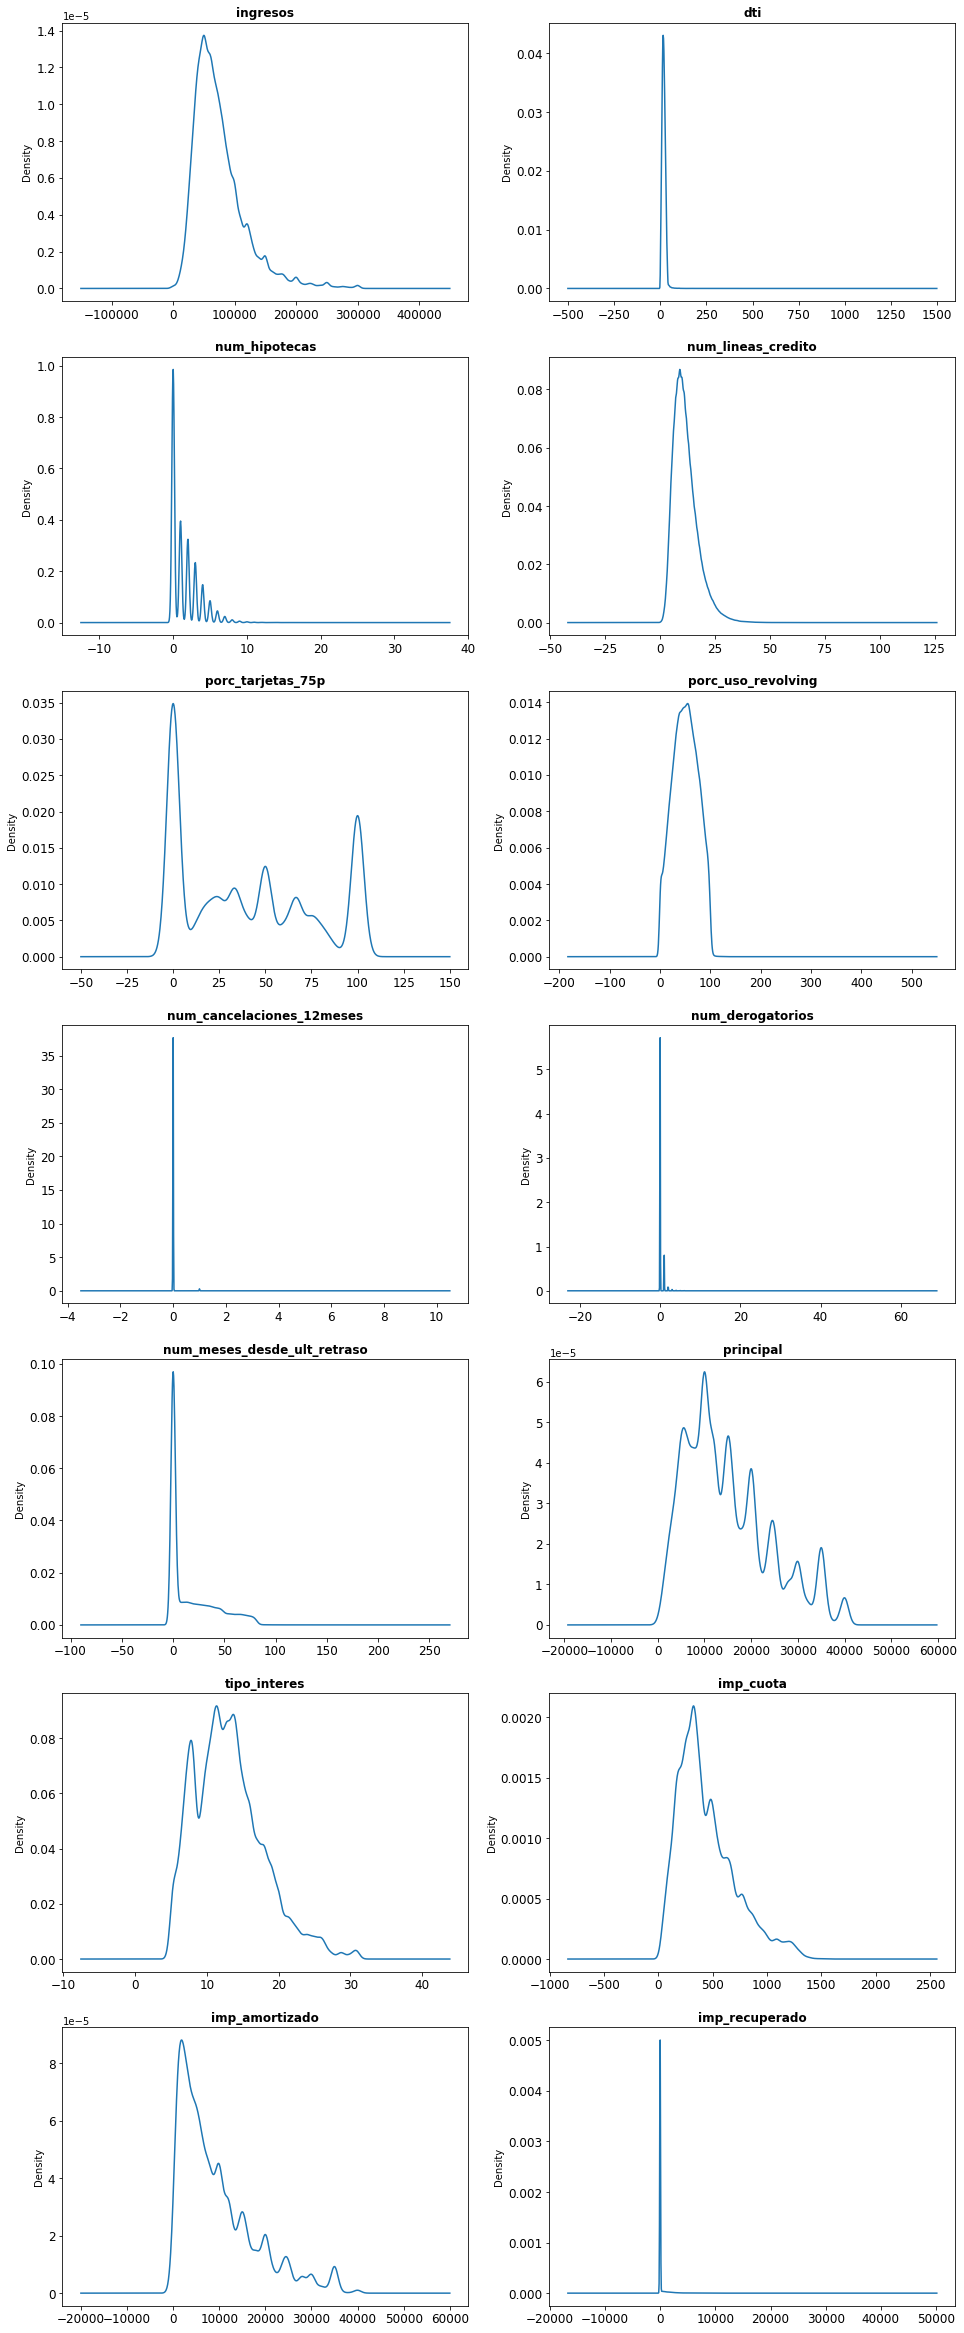

In [18]:
graficos_eda_continuas(num)

Vamos a analizar el detalle de imp_amortizado e imp_recuperado, ya que son relevantes para la target del modelo LGD.

In [15]:
ratios = num[['principal','imp_amortizado','imp_recuperado']].copy()

In [16]:
ratios['r_amortizado_principal'] = ratios.imp_amortizado / ratios.principal
ratios['r_recuperado_principal'] = ratios.imp_recuperado / ratios.principal

In [17]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
principal,139076.0,14987.814576,9142.228898,500.0,8000.000000,12800.000000,20000.0000,40000.000000
imp_amortizado,139076.0,9459.304305,8265.344008,0.0,3000.000000,7000.000000,13740.6325,40000.000000
imp_recuperado,139076.0,146.275953,771.129850,0.0,0.000000,0.000000,0.0000,33666.340000
r_amortizado_principal,139076.0,0.661670,0.369499,0.0,0.273813,0.868013,1.0000,1.000032
r_recuperado_principal,139076.0,0.009037,0.041317,0.0,0.000000,0.000000,0.0000,1.220774


Conclusiones:

* En transformación convertir num_derogatorios a binaria
* Revisar en profundidad la relación entre estado e imp_recuperado

In [18]:
temp = cat[['estado']].merge(num[['imp_recuperado']], left_index=True, right_index=True)
temp.groupby('estado').imp_recuperado.mean()

estado
Charged Off                                            1227.022412
Current                                                   0.000000
Default                                                   0.000000
Does not meet the credit policy. Status:Charged Off     550.779167
Does not meet the credit policy. Status:Fully Paid        0.000000
Fully Paid                                                0.000000
In Grace Period                                           0.000000
Late (16-30 days)                                         0.000000
Late (31-120 days)                                        0.000000
Name: imp_recuperado, dtype: float64

Solo hay importe recuperado en el estado Charged Off.

## GUARDAR DATASETS TRAS EDA

In [19]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [20]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)